Problem 1: Healthcare Patient Readmission Risk
Prediction
Scenario: You work for a healthcare provider that wants to reduce hospital
readmissions by identifying high-risk patients who might need additional
post-discharge care.
Dataset: The "Hospital Readmission" dataset contains 10,000 patient records
with fields including:
Tasks:
1. Load the dataset and perform exploratory data analysis:

- Display first and last 5 rows
- Check correlation between features
- Handle missing values appropriately
3. Apply appropriate scaling/normalization to the numeric features
4. Build classification models using:
- Random Forest
- Decision Trees
- SVM
5. For each model, calculate and compare:
- Accuracy
- F1-score
- ROC AUC
- Log Loss
6. Use K-means clustering to segment patients into risk groups based on
their features.
7. Apply PCA to reduce dimensionality and visualize the clusters.
8. Select the best performing model and explain why it's most appropriate
for this healthcare scenario.
Dataset: "Diabetes 130-US hospitals for years 1999-2008" dataset”

Link:-
https://www.kaggle.com/datasets/brandao/diabetes?select=diabetic_dat
a.csv


1. Load the dataset and perform exploratory data analysis:
- Display first and last 5 rows
- Check correlation between features
- Handle missing values appropriately


In [2]:
import pandas as pd
df = pd.read_csv('./Datasets/diabetic_data.csv')

In [3]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
df.tail()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO
101765,443867222,175429310,Caucasian,Male,[70-80),?,1,1,7,6,...,No,No,No,No,No,No,No,No,No,NO


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

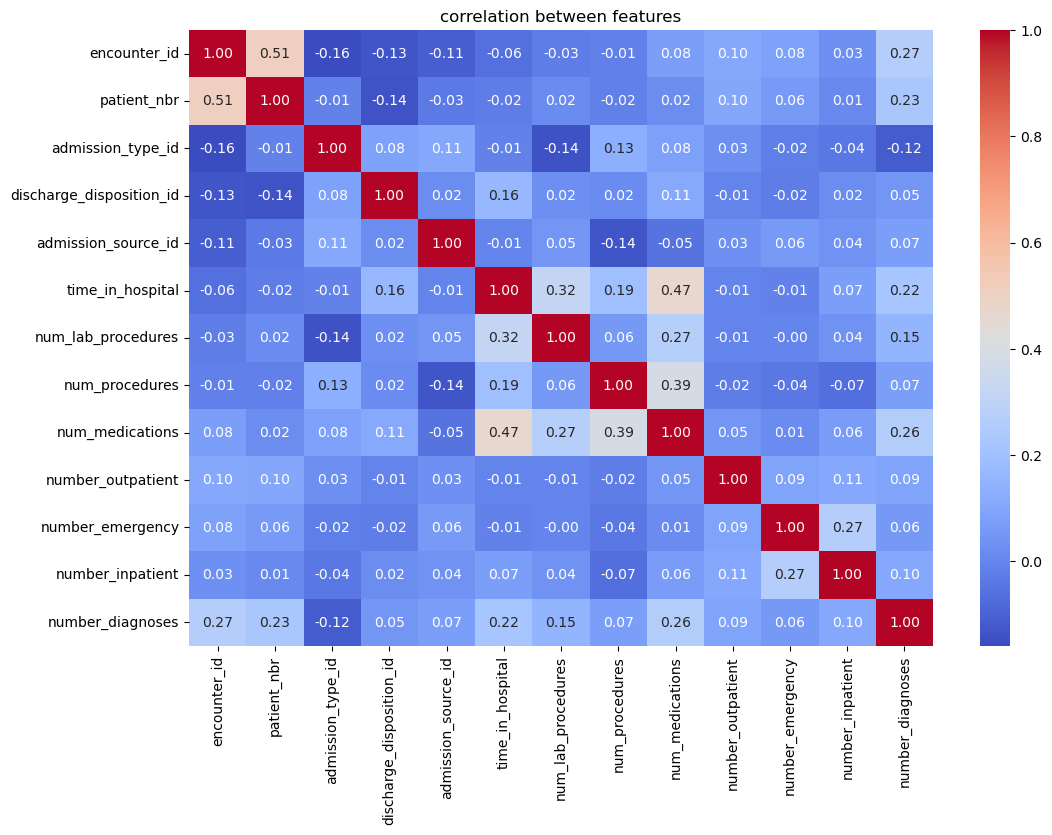

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_mat = df.select_dtypes(include=['float', 'int']).corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr_mat,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('correlation between features')
plt.show()

In [7]:
missing_summary = df.isna().sum()
print(missing_summary)

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [8]:
df.max_glu_serum.value_counts()

max_glu_serum
Norm    2597
>200    1485
>300    1264
Name: count, dtype: int64

In [16]:
df['max_glu_serum'].fillna(df['max_glu_serum'].mode()[0], inplace=True)

In [17]:
missing_summary = df.isna().sum()
print(missing_summary)

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

In [11]:
df.max_glu_serum.value_counts()

max_glu_serum
Norm    99017
>200     1485
>300     1264
Name: count, dtype: int64

In [12]:
df['A1Cresult'].fillna(df['A1Cresult'].mode()[0], inplace=True)

C:\Users\dbda38\AppData\Local\Temp\ipykernel_18672\1247597991.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['A1Cresult'].fillna(df['A1Cresult'].mode()[0], inplace=True)


In [13]:
missing_summary = df.isna().sum()
print(missing_summary)

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

2. Apply appropriate scaling/normalization to the numeric features

In [14]:
df.select_dtypes(include='number').head(10)

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
0,2278392,8222157,6,25,1,1,41,0,1,0,0,0,1
1,149190,55629189,1,1,7,3,59,0,18,0,0,0,9
2,64410,86047875,1,1,7,2,11,5,13,2,0,1,6
3,500364,82442376,1,1,7,2,44,1,16,0,0,0,7
4,16680,42519267,1,1,7,1,51,0,8,0,0,0,5
5,35754,82637451,2,1,2,3,31,6,16,0,0,0,9
6,55842,84259809,3,1,2,4,70,1,21,0,0,0,7
7,63768,114882984,1,1,7,5,73,0,12,0,0,0,8
8,12522,48330783,2,1,4,13,68,2,28,0,0,0,8
9,15738,63555939,3,3,4,12,33,3,18,0,0,0,8


In [18]:
X = df.iloc[:,2:-1]
y=df.iloc[:,-1]

In [19]:
X.head()

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
0,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,No
1,Caucasian,Female,[10-20),?,1,1,7,3,?,?,...,No,No,Up,No,No,No,No,No,Ch,Yes
2,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,...,No,No,No,No,No,No,No,No,No,Yes
3,Caucasian,Male,[30-40),?,1,1,7,2,?,?,...,No,No,Up,No,No,No,No,No,Ch,Yes
4,Caucasian,Male,[40-50),?,1,1,7,1,?,?,...,No,No,Steady,No,No,No,No,No,Ch,Yes


In [23]:
df.weight.value_counts()

weight
[75-100)     1336
[50-75)       897
[100-125)     625
[125-150)     145
[25-50)        97
[0-25)         48
[150-175)      35
[175-200)      11
>200            3
Name: count, dtype: int64

In [22]:
import numpy as np
import pandas as pd

# Replace '?' with NaN
df['weight'] = df['weight'].replace('?', np.nan)

# Function to process weight ranges
def process_weight(value):
    if pd.isna(value):
        return np.nan
    elif value.startswith('['):  # Handle ranges like [75-100)
        lower, upper = value.lstrip('[').rstrip(')').split('-')
        return (float(lower) + float(upper)) / 2
    elif value.startswith('>'):  # Handle '>200'
        return 200
    else:
        return np.nan

# Apply the function to create the numeric weight column
df['weight_numeric'] = df['weight'].apply(process_weight)

# Impute missing values in 'weight_numeric' with the mean
mean_weight = df['weight_numeric'].mean()
df['weight_numeric'] = df['weight_numeric'].fillna(mean_weight)

# Create weight categories
bins = [0, 50, 100, 150, 200, np.inf]
labels = ['0-50', '50-100', '100-150', '150-200', '>200']
df['weight_category'] = pd.cut(df['weight_numeric'], bins=bins, labels=labels)

# Display the processed columns
print(df[['weight', 'weight_numeric', 'weight_category']].head())

  weight  weight_numeric weight_category
0    NaN       86.268377          50-100
1    NaN       86.268377          50-100
2    NaN       86.268377          50-100
3    NaN       86.268377          50-100
4    NaN       86.268377          50-100
